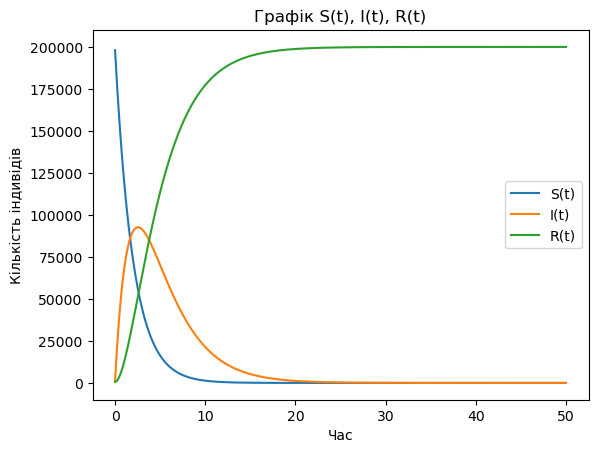

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar

# Початкові умови та параметри
alpha = 0.5
beta = 0.3
N = 1000000

S0 = 990000
I0 = 7000
R0 = 3000

t0 = 0
tf = 50

def dSdt(t, S, I):
    return -alpha * S

def dIdt(t, S, I):
    return alpha * S - beta * I

def dRdt(t, I):
    return beta * I

sol = solve_ivp(
    fun=lambda t, y: [dSdt(t, y[0], y[1]), dIdt(t, y[0], y[1]), dRdt(t, y[1])],
    t_span=(t0, tf),
    y0=[S0, I0, R0],
    method='RK45',
    dense_output=True
)

t_interp = np.linspace(t0, tf, 10000)
S = sol.sol(t_interp)[0] * 0.2
I = sol.sol(t_interp)[1] * 0.2
R = sol.sol(t_interp)[2] * 0.2

f_S = interp1d(t_interp, S, kind='cubic')
f_I = interp1d(t_interp, I, kind='cubic')
f_R = interp1d(t_interp, R, kind='cubic')

t_plot = np.linspace(t0, tf, 1000)
plt.plot(t_plot, f_S(t_plot), label='S(t)')
plt.plot(t_plot, f_I(t_plot), label='I(t)')
plt.plot(t_plot, f_R(t_plot), label='R(t)')
plt.xlabel('Час')
plt.ylabel('Кількість індивідів')
plt.title('Графік S(t), I(t), R(t)')
plt.legend()
plt.show()

In [2]:
def S_func(t, S0, alpha):
    return S0 * np.exp(-alpha * t)


In [3]:
def I_func(t, I0, S0, alpha):
    return (I0 + alpha * S0 * t) * np.exp(-alpha * t)


In [4]:
S_values = S_func(t_plot, S0, alpha)
I_values = I_func(t_plot, I0, S0, alpha)


In [5]:
R_values = N - S_values - I_values


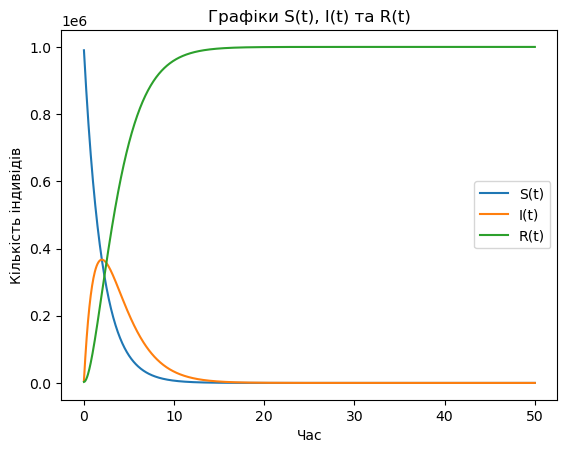

In [6]:
plt.plot(t_plot, S_values, label='S(t)')
plt.plot(t_plot, I_values, label='I(t)')
plt.plot(t_plot, R_values, label='R(t)')
plt.xlabel('Час')
plt.ylabel('Кількість індивідів')
plt.title('Графіки S(t), I(t) та R(t)')
plt.legend()
plt.show()


In [7]:
# Оптимізаційна функція, що мінімізується
def neg_I_func(t):
    return -I_func(t, I0, S0, alpha)

# Знаходження максимуму функції
result = minimize_scalar(neg_I_func, bounds=(t0, tf), method='bounded')
t_max = result.x
max_infections = -result.fun

print('Час t_max:', t_max)
print('Максимальна кількість інфекційних індивідів:', max_infections)

Час t_max: 1.9858578248799676
Максимальна кількість інфекційних індивідів: 366784.92843051004
